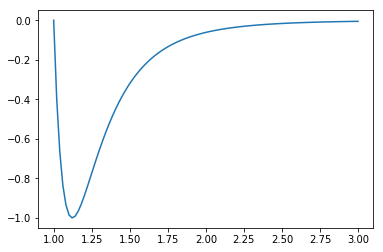

minimum value:    -0.999955009866677


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.plot(r, LJ(r))
plt.show()

print('minimum value:   ', min(LJ(r)))

In [49]:
import scipy.spatial.distance as sd
import numpy as np

def potential(r):
       U = 4.*(np.power(r,-12) - np.power(r,-6))
       return U

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E

def scipy_LJ(arr, sigma=None):
    """
    Computes the Lennard-Jones potential for an array (M x N) of M points
    in N dimensional space. Usage of a sigma parameter is optional.
    """

    if len(arr.shape)==1:
        arr = arr[:,None]

    r = sd.pdist(arr)

    if sigma==None:
        np.power(r, -6, out=r)
        return np.sum(r**2 - r)*4

    else:
       r *= sigma
       np.power(r, -6, out=r)
       return np.sum(r**2 - r)*4

#points = np.random.rand(N,3)+0.1

def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
pos = init_pos(2)
print("total energy is: ", total_energy(pos))
#print("scipy LJ is: ", scipy_LJ(points, 1))

total energy is:  -0.003768446603922468
